<a href="https://colab.research.google.com/github/rahiakela/practical-machine-learning-with-tensorflow/blob/week-8/assignment_8_custom_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Custom training

## Setup

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
tf.random.set_seed(1)

TensorFlow 2.x selected.


## Fit a linear model

Use the concepts you have learned so far—Tensor, Variable, and GradientTape—to build and train a simple model.

Create a simple linear model, f(x) = x * W + b, which has two variables: W (weights) and b (bias).

### Define the model

##### 9) What will be the output of the model before training if we give x = 3.0 as input?

In [3]:
# Initialize the weights to `3.0` and the bias to `0.0`
class Model(object):

  def __init__(self):
    self.W = tf.Variable(3.0)
    self.b = tf.Variable(0.0)

  def __call__(self, x):
    return self.W * x + self.b

model = Model()
model(3.0).numpy()

9.0

##### 10) What is the range of loss after the 10th epoch during the training process?

In [0]:
def loss(predicted_y, target_y):
  return tf.reduce_mean(tf.square(predicted_y - target_y))

### Obtain training data

First, synthesize the training data by adding random Gaussian (Normal) noise to the inputs:

In [0]:
TRUE_W = 5.0
TRUE_b = 10.0
NUM_EXAMPLES = 1000

inputs  = tf.random.normal(shape=[NUM_EXAMPLES])
noise   = tf.random.normal(shape=[NUM_EXAMPLES])
outputs = inputs * TRUE_W + TRUE_b + noise

Before training the model, visualize the loss value by plotting the model's predictions in red and the training data in blue:

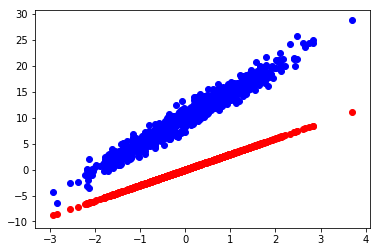

Current loss: 107.770065


In [10]:
import matplotlib.pyplot as plt

plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()

print('Current loss: %1.6f' % loss(model(inputs), outputs).numpy())

### Define a training loop

In [0]:
def train(model, inputs, outputs, learning_rate):

  with tf.GradientTape() as t:
    current_loss = loss(model(inputs), outputs)
  dW, db = t.gradient(current_loss, [model.W, model.b])
  model.W.assign_sub(learning_rate * dW)
  model.b.assign_sub(learning_rate * db)  

Finally, let's repeatedly run through the training data and see how `W` and `b` evolve.

Epoch  0: W=3.00 b=0.00, loss=107.77007
Epoch  1: W=3.52 b=2.02, loss=68.56483
Epoch  2: W=3.91 b=3.64, loss=43.80209
Epoch  3: W=4.21 b=4.93, loss=28.15146
Epoch  4: W=4.43 b=5.95, loss=18.25341
Epoch  5: W=4.59 b=6.77, loss=11.98932
Epoch  6: W=4.72 b=7.42, loss=8.02232
Epoch  7: W=4.81 b=7.95, loss=5.50831
Epoch  8: W=4.87 b=8.36, loss=3.91398
Epoch  9: W=4.92 b=8.69, loss=2.90217


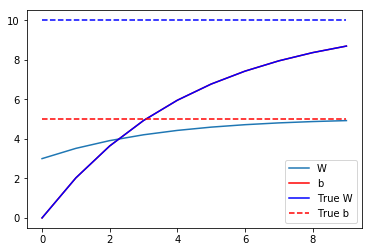

In [12]:
model = Model()

# Collect the history of W-values and b-values to plot later
Ws, bs = [], []
epochs = range(10)

for epoch in epochs:
  Ws.append(model.W.numpy())
  bs.append(model.b.numpy())
  current_loss = loss(model(inputs), outputs)

  # train the model
  train(model, inputs, outputs, learning_rate=0.1)
  print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' % (epoch, Ws[-1], bs[-1], current_loss))

# Let's plot it all
plt.plot(epochs, Ws, bs, 'r', epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--', [TRUE_b] * len(epochs), 'b--')
plt.legend(['W', 'b', 'True W', 'True b'])
plt.show()

### 11) What is the range of loss after the 20th epoch?

Epoch  0: W=3.00 b=0.00, loss=107.77007
Epoch  1: W=3.52 b=2.02, loss=68.56483
Epoch  2: W=3.91 b=3.64, loss=43.80209
Epoch  3: W=4.21 b=4.93, loss=28.15146
Epoch  4: W=4.43 b=5.95, loss=18.25341
Epoch  5: W=4.59 b=6.77, loss=11.98932
Epoch  6: W=4.72 b=7.42, loss=8.02232
Epoch  7: W=4.81 b=7.95, loss=5.50831
Epoch  8: W=4.87 b=8.36, loss=3.91398
Epoch  9: W=4.92 b=8.69, loss=2.90217
Epoch 10: W=4.96 b=8.96, loss=2.25957
Epoch 11: W=4.98 b=9.17, loss=1.85117
Epoch 12: W=5.00 b=9.34, loss=1.59142
Epoch 13: W=5.01 b=9.47, loss=1.42608
Epoch 14: W=5.02 b=9.58, loss=1.32077
Epoch 15: W=5.03 b=9.67, loss=1.25363
Epoch 16: W=5.03 b=9.74, loss=1.21081
Epoch 17: W=5.03 b=9.79, loss=1.18346
Epoch 18: W=5.04 b=9.84, loss=1.16600
Epoch 19: W=5.04 b=9.87, loss=1.15483


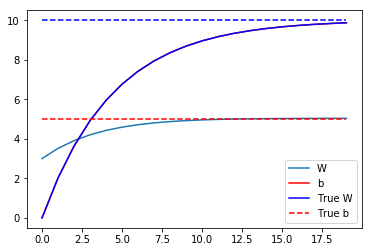

In [13]:
model = Model()

# Collect the history of W-values and b-values to plot later
Ws, bs = [], []
epochs = range(20)

for epoch in epochs:
  Ws.append(model.W.numpy())
  bs.append(model.b.numpy())
  current_loss = loss(model(inputs), outputs)

  # train the model
  train(model, inputs, outputs, learning_rate=0.1)
  print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' % (epoch, Ws[-1], bs[-1], current_loss))

# Let's plot it all
plt.plot(epochs, Ws, bs, 'r', epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--', [TRUE_b] * len(epochs), 'b--')
plt.legend(['W', 'b', 'True W', 'True b'])
plt.show()

### 12) What is the range of loss after the 20th epoch if learning rate was 0.01?

Epoch  0: W=3.00 b=0.00, loss=107.77007
Epoch  1: W=3.05 b=0.20, loss=103.44574
Epoch  2: W=3.10 b=0.40, loss=99.29722
Epoch  3: W=3.15 b=0.60, loss=95.31730
Epoch  4: W=3.20 b=0.79, loss=91.49915
Epoch  5: W=3.25 b=0.97, loss=87.83617
Epoch  6: W=3.29 b=1.15, loss=84.32204
Epoch  7: W=3.34 b=1.33, loss=80.95070
Epoch  8: W=3.38 b=1.51, loss=77.71632
Epoch  9: W=3.42 b=1.68, loss=74.61333
Epoch 10: W=3.46 b=1.85, loss=71.63636
Epoch 11: W=3.51 b=2.01, loss=68.78032
Epoch 12: W=3.54 b=2.18, loss=66.04027
Epoch 13: W=3.58 b=2.33, loss=63.41147
Epoch 14: W=3.62 b=2.49, loss=60.88942
Epoch 15: W=3.66 b=2.64, loss=58.46975
Epoch 16: W=3.69 b=2.79, loss=56.14831
Epoch 17: W=3.73 b=2.94, loss=53.92110
Epoch 18: W=3.76 b=3.08, loss=51.78430
Epoch 19: W=3.80 b=3.22, loss=49.73419


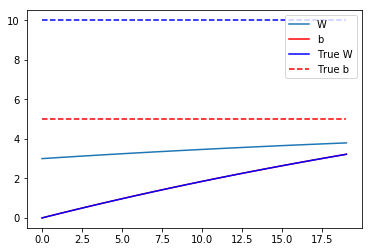

In [14]:
model = Model()

# Collect the history of W-values and b-values to plot later
Ws, bs = [], []
epochs = range(20)

for epoch in epochs:
  Ws.append(model.W.numpy())
  bs.append(model.b.numpy())
  current_loss = loss(model(inputs), outputs)

  # train the model
  train(model, inputs, outputs, learning_rate=0.01)
  print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' % (epoch, Ws[-1], bs[-1], current_loss))

# Let's plot it all
plt.plot(epochs, Ws, bs, 'r', epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--', [TRUE_b] * len(epochs), 'b--')
plt.legend(['W', 'b', 'True W', 'True b'])
plt.show()